# Roads Analysis

#### Calculate the miles of roads inundated in each MA county using the Fant et al. data

In [20]:
# Import libraries
import geopandas as gpd
import pandas as pd
import pygris
import fiona
import matplotlib.pyplot as plt
import contextily as cx

In [7]:
# Path to the fants data
fants_path = '../data/raw/roads/fants_data/FloodedSegs.gdb'

In [ ]:
# List all layers in the GDB
layers = fiona.listlayers(fants_path)
print("Layers in {}:".format(fants_path))
for layer in layers:
    print(layer)

In [54]:
# function to get the miles of road flooded in each county in the Fant et al data
def get_fld_rds(data_path, which_state:str, which_county:str):

    # Read in the two road type layers for each state
    state_1_2 = gpd.read_file(data_path, layer=f'{which_state}_1_2')[['FIPS', 'geometry']]
    state_3_7 = gpd.read_file(data_path, layer=f'{which_state}_3_7')[['FIPS', 'geometry']]

    # Combine into one
    state_roads = pd.concat([state_1_2, state_3_7])
    county_roads = state_roads[state_roads.FIPS == which_county]
    
    # plot it
    fig, ax = plt.subplots(figsize=(15, 10))
    county_roads.plot(ax=ax)
    cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=14, crs = county_roads.crs)

    # get the miles inundated in the county
    county_roads['m'] = county_roads.geometry.length
    county_roads['mi'] = county_roads['m'] / 1609.34
    mi_cnty_rd = county_roads['mi'].sum()
    print('Miles of road affected: ', mi_cnty_rd)

    return county_roads

In [ ]:
barnstable_rds =  get_fld_rds(fants_path, 'massachusetts', '25001')

c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Miles of road affected:  6.247715642525145


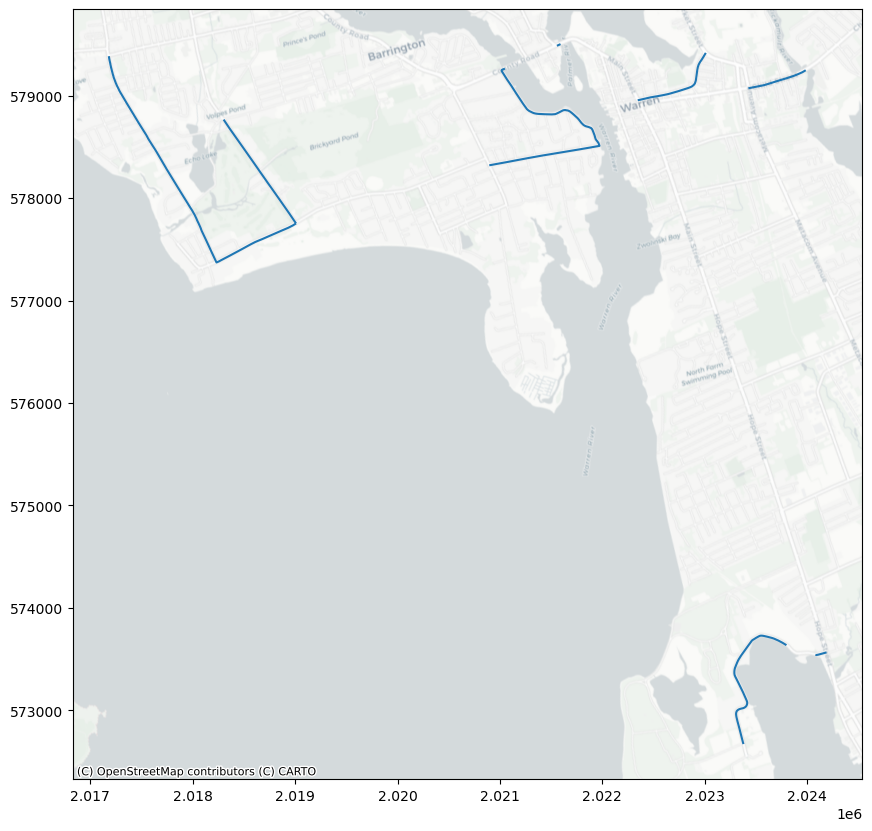

In [55]:
bristol_rds =  get_fld_rds(fants_path, 'rhodeisland', '44001')

c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\AMarley.ERG\.conda\envs\geospatial-new\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Miles of road affected:  79.06237944936427


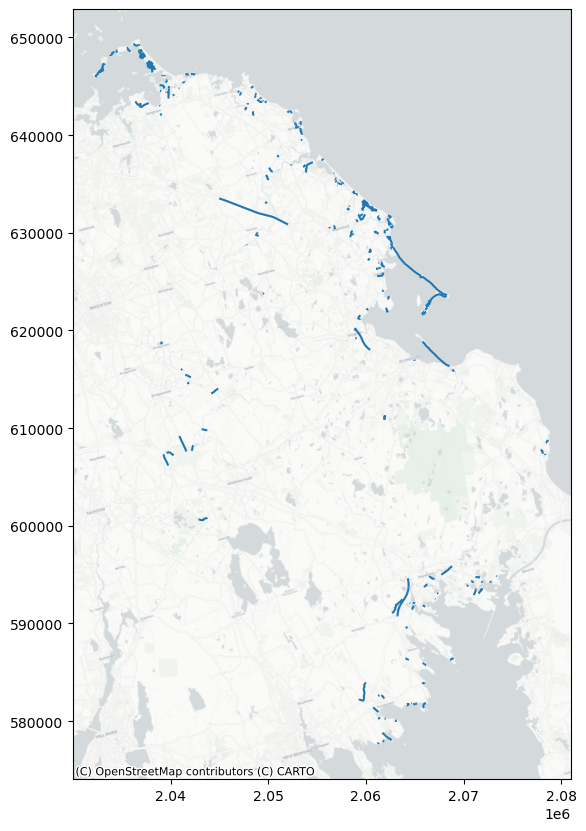

In [53]:
plymouth_rds =  get_fld_rds(fants_path, 'massachusetts', '25023')

In [37]:
bristol_rds

,FIPS,geometry,m,mi
0,44001,"MULTILINESTRING ((2023376.307 572670.026, 2023...",1639.061145,1.018468
4,44001,"MULTILINESTRING ((2019009.332 577752.385, 2018...",1235.661338,0.767806
5,44001,"MULTILINESTRING ((2019009.332 577752.385, 2018...",3148.699397,1.956516
8,44001,"MULTILINESTRING ((2020895.487 578319.717, 2020...",2454.187546,1.524965
12,44001,"MULTILINESTRING ((2022344.473 578954.316, 2022...",910.683375,0.565874
13,44001,"MULTILINESTRING ((2023424.915 579071.652, 2023...",588.922008,0.365940
16,44001,"MULTILINESTRING ((2021048.399 579263.520, 2021...",38.643386,0.024012
20,44001,"MULTILINESTRING ((2021591.147 579502.715, 2021...",38.840498,0.024134
